In [1]:
# for this notebook make the path in the same folder (currently is in the project folder)
import os
import sys
import importlib

# Add the path to the val03 folder to sys.path so modules in the same folder can be imported
sys.path.append(os.path.join('notebooks', '102 minima varianza'))

In [2]:
from scripts import style
importlib.reload(style)
style.set_style()

In [3]:
# usage_example.py
import importlib
import py102
importlib.reload(py102)

<module 'py102' from 'c:\\Users\\herie\\GitHub\\Proyectos\\En Pausa\\Estimacion de Tendencia\\notebooks\\102 minima varianza\\py102.py'>

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\102 minima varianza\py102.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== AAPL transform 'close' ===
Variance: 5.332256e+03
[train    ]  RMSE = 16.565844   RMSE_w = 19.728793
[val      ]  RMSE = 44.415727   RMSE_w = 43.168886
[test     ]  RMSE = 69.780002   RMSE_w = 76.241381
[train_val]  RMSE = 26.431469   RMSE_w = 32.779896

=== AAPL transform 'log_close' ===
Variance: 6.634909e-01
[train    ]  RMSE = 0.207226   RMSE_w = 0.233821
[val      ]  RMSE = 0.286299   RMSE_w = 0.220452
[test     ]  RMSE = 0.110149   RMSE_w = 0.106856
[train_val]  RMSE = 0.229543   RMSE_w = 0.254003

=== AAPL transform 'sqrt_close' ===
Variance: 1.355907e+01
[train    ]  RMSE = 0.882910   RMSE_w = 1.028504
[val      ]  RMSE = 1.734211   RMSE_w = 1.543307
[test     ]  RMSE = 1.781349   RMSE_w = 1.870882
[train_val]  RMSE = 1.155860   RMSE_w = 1.367801

=== AAPL transform 'diff_close' ===
Variance: 5.039712e+00
[train    ]  RMSE = 1.270990   RMSE_w = 1.623157
[val      ]  RMSE = 2.800025   RMSE_w = 2.770141
[test     ]  RMSE = 3.532630   RMSE_w = 3.893577
[train_val]  RMSE = 1.7

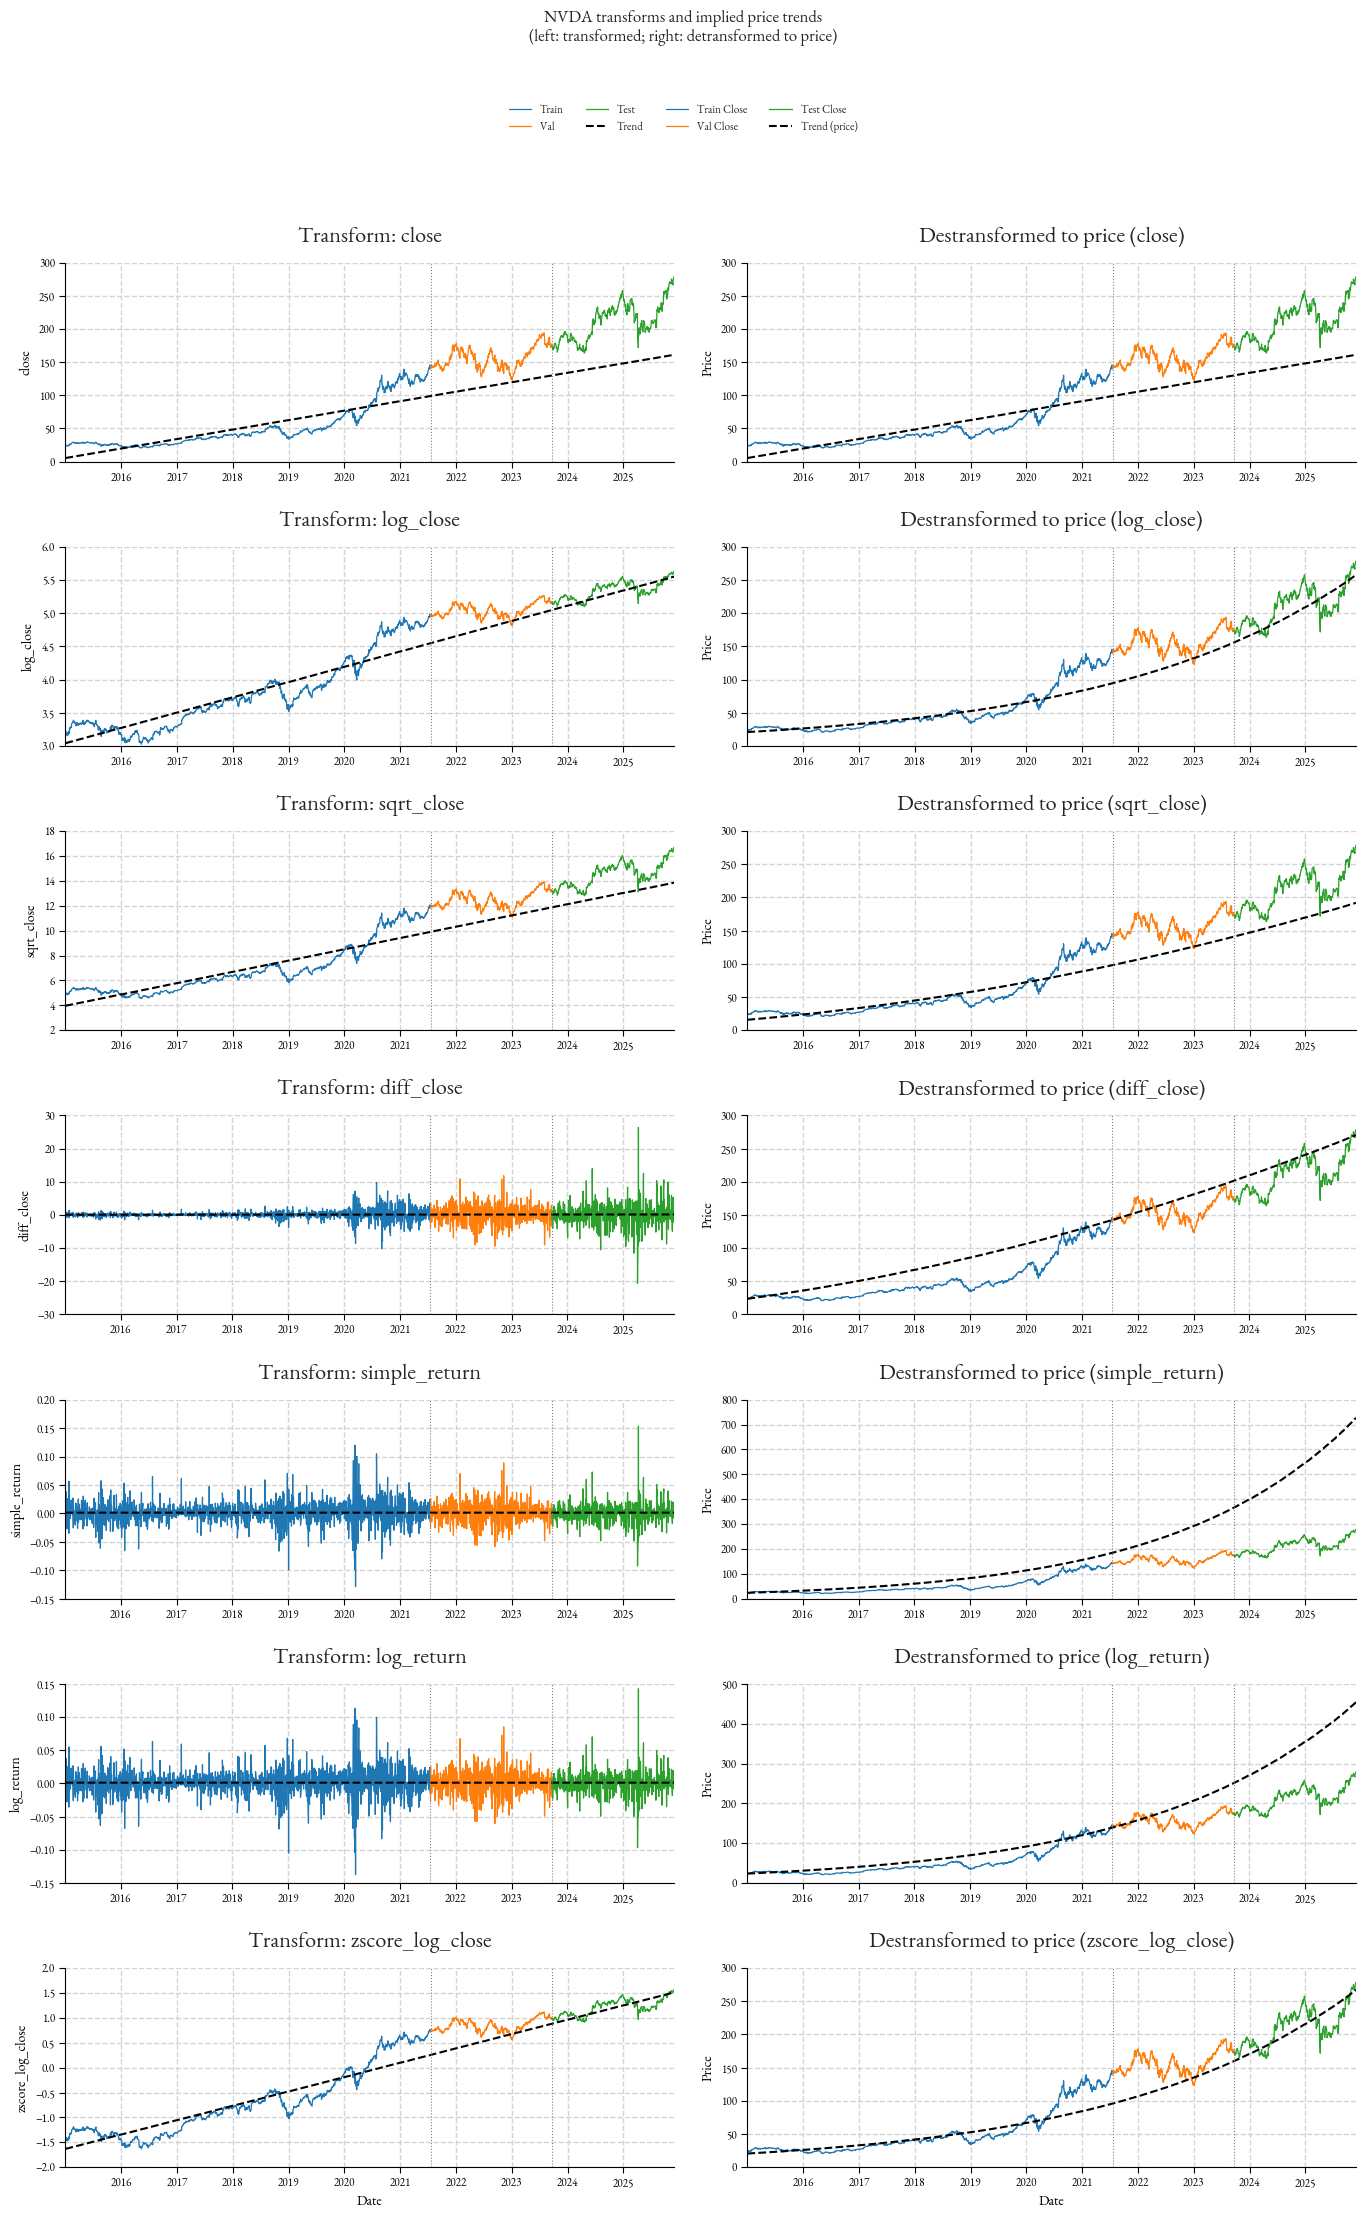

In [4]:
# usage_example.py

from py102 import (  # or nvda_trend_transforms
    run_all_transforms_experiment,
    subplot_all_transforms_and_destransforms,
)

# Run all transforms once
all_results, all_models, df_all = run_all_transforms_experiment(
    transform_names=None,  # None = all defined transforms
    ticker="AAPL",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
)

print("\n=== Summary over all transforms ===")
for name, res in all_results.items():
    var_ = res["variance"]
    rmse_train = res["metrics"]["train"]["rmse"]
    rmse_test = res["metrics"]["test"]["rmse"]
    print(
        f"{name:15s} | Var = {var_: .6e} | "
        f"RMSE_train = {rmse_train:.6f} | RMSE_test = {rmse_test:.6f}"
    )

# Single figure with subplots:
#   left column  = each transform (y_t) with trend
#   right column = original Close with "destransformed" trend
subplot_all_transforms_and_destransforms(
    df=df_all,
    models=all_models,
    transform_names=None,   # or a subset list, e.g. ['close','log_close','log_return']
    train_frac=0.6,
    val_frac=0.2,
)
